Alejandro Requena Menéndez. 
4º Biotecnología UV. 
Curso 2020/2021.
# Análisis filogenético del receptor muscarínico de acetilcolina CHRM1

## Preparación del ambiente de computación

In [1]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

## Introducción
La maquinaria de expresión génica del genoma humano, a la hora de transcribir y traducir genes relacionados con los receptores de acetilcolina, llega a sintetizar hasta 83 proteínas diferentes de las 812 que se conoce que participan en el proceso de neurotransmisión en el Sistema Nervioso Central (Viscardi *et al.*, 2021). Una de ellas es CHRM1, un receptor muscarínico de acetilcolina.  

Se sugiere que esta proteína comenzó a expresarse, por primera vez; y junto a otros receptores de acetilcolina; antes de la división filogenética entre cordados y cnidarios (Viscardi *et al.*, 2021), lo que significa que grupos taxonómicos eucariotas anteriores no constan de este producto génico. Entre estos últimos organismos mencionados, encontraríamos platelmintos (gusanos planos), poríferos (esponjas), protozoos, hongos, plantas... etc. 

En este análisis, se pretende comprobar la distribución filogenética mencionada recientemente estudiando las homologías de la CHRM1 expresada en *Homo sapiens* con las secuencias que alberga la base de datos Swissprot. Por un lado, las similitudes de secuencia entre humanos y otros organismos deberían ser menores según nos alejamos de los primates en el árbol filogenético. Por otro, y conforme a Viscardi *et al* (2021) no deberíamos encontrar homologías significativas más allá del clado de los cordados, ya que, supuestamente, estos receptores de acetilcolina, en organismos anteriores filogenéticamente, no existían.





## Métodos
El ambiente de computación ha sido proporcionado por el archivo `preparar_ambiente.sh`, ejecutable desde R. El comando correspondiente es el que se puede encontrar al principio del todo de este análisis. Permite la descarga de BLAST y de un archivo que nos permite acceder a información sobre los grupos taxonómicos que han sido analizados.

La base de datos consultada, como ya se ha comentdo, es Swissprot. El programa de alineamiento de secuencias empleado ha sido BLASTP (Altschul *et al.*, 1990). 

Para homologías más similares a las secuencias humanas se ha empleado un valor E muy restrictivo (1.0e-50) que descarta alineamientos con no verdaderos que tienen una probabilidad relativamente alta de aparecer (entendiendo el valor E como la cantidad de alineamientos que se obtendrían de forma aleatoria con una puntuación de homología determinada o mayor dadas unas condiciones de búsqueda), en este caso 10^-50. Para observar la divergencia de secuencias codificantes, inversamente proporcional a la cercanía filogenética con *Homo sapiens*, se han empleado diferentes valores E, gradualmente menos restrictivos (1.0e-50, 1.0e-40, 1.0e-30, 1.0e-20, 1.0e-10, 1.0e-8, 1.0e-6, 1.0e-4, 1.0e-2 y 1).


## Resultados

### BLATP individual
Primero, se ha ejecutado un BLASTP individual de CHRM1 con un valor E muy restrictivo (1.0e-50), de forma que sólo deberíamos visualizar alineamientos con un alto grado de homología a las proteínas codificadas en el genoma humano. 

Los resultados de este alineamiento local muestran esta información, distribuida en columnas, en la tabla mostrada a continuación:
- **saccver**:  identificador de la secuencia encontrada en Swissprot.
- **pident**: porcentaje de identidad entre ambas secuencias alineadas.
- **length**: longitud la secuencia alineada entre las dos secuencias.
- **qstart**: número del aminoácido de la *query* (secuencia de partida) en donde comienza el alineamiento de ambas secuencias.
- **qend**: número del aminoácido de la *query* en que acaba el alineamiento de ambas secuencias.
- **sstart**: número del aminoácido de la secuencia *subject* (aquella que es alineada con la *query*) en donde comienza el alineamiento de ambas secuencias.
- **send**: número del último aminoácido de la secuencia *subject* en donde se produce el alineamiento de ambas secuencias.
- **evalue**: valor E del alineamiento (número de alineamientos generados aleatoriamente, dadas unas condiciones de búsqueda determinadas, que esperamos encontrar).
- **staxid**: identificador; en la base de datos de taxonomía del NCBI; de la especie con la que se ha alineado la proteína de partida (*query*).
- **ssciname**: nombre científico de la especie con la que se ha alineado la proteína de partida (*query*)
- **sblastname**: nombre del grupo taxonómico al que pertenece el organismo con el que se ha alineado la proteína de partida (*query*).



In [2]:
# Primero, creamos el objeto que va a albergar los resultados de este primer BLASTP.

BLASTP1CHRM1 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1.fas',
                              '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

# Traducimos el texto plano generado en este Blastp a una tabla que reúna la información mencionada y especificada con el comando '-outfmt'
TablaBLASTP1CHRM1 <- read.table(textConnection(BLASTP1CHRM1),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

# Ver el número de filas de la tabla generada nos permitirá saber cuántos alineamientos se han producido
dim(TablaBLASTP1CHRM1)


[1] 37 11

La tabla generada por el primer BLASTP de CHRM1 consta de 37 filas, lo que es indicativo de que, con este valor E tan restrictivo, se han producido 36 alineamientos (la primera fila de todas es la secuencia utilizada como moldealineada consigo misma, es decir, la que se ha introducido como *query* en el programa de alineamiento). Para ver en detalle estos resultados: 

In [4]:
TablaBLASTP1CHRM1

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


Como se puede observar, los resultados con un mayor grado de homología corresponden a dos primates, dos roedores y un ungulado par, todos ellos mamíferos, con un porcentaje de identidad superior al 98%. Además, la longitud de alineamiento y posición del mismo coincide en los cinco casos. 

A partir del sexto alineamiento, el porcentaje de identidad desciende drásticamente a un poco más del 50%. Si bien es cierto que los grupos taxonómicos en los que más homologías se encuentran son los mamíferos anteriormente mencionados, a partir de una identidad inferior al 50% comienzan a aparecer vertebrados no mamíferos tales como pájaros, ranas y sapos e, incluso, invertebrados como *Drosophila melanogaster* y *Caernorhabditis elegans*. Por último, también es posible encontrar, con un porcentaje de identidad inferior al 30%, un alineamiento con un crustáceo. 


### BLASTP en serie

A continuación, para demostrar que el número de alineamientos obtenidos es mayor según el valor E es más grande; es decir, más permisivo; se ha ejecutado otro BLASTP con hasta diez valores E diferentes: 1.0e-50, 1.0e-40, 1.0e-30, 1.0e-20, 1.0e-10, 1.0e-8, 1.0e-6, 1.0e-4, 1.0e-2 y 1. Si agrupamos todos estos valores E en un único objeto y ejecutamos el comando `lapply()` dirigido a este mismo objeto, esta búsqueda se vuelve automática y hace innecesaria la elaboración de un comando para cada alineamiento. También es posible mostrar, como en el BLASTP anterior, cada una de las búsquedas realizadas en forma de tabla.

In [3]:
#El objeto sobre el que aplicaremos el comando `-lapply` será uno que contenga todos los valores E empleados en este BLASTP seriado-.
Valores_E_maximos <- c('1.0e-50', '1.0e-40', '1.0e-30', '1.0e-20', '1.0e-10',
                       '1.0e-08', '1.0e-06', '1.0e-04', '1.0e-02', '1')


Lista_de_Tablas_CHRM1 <- lapply(Valores_E_maximos,
                          function(x) {
                              BLASTP2CHRM1 <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRM1.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BLASTP2CHRM1),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

Al ejecutarse un BLASTP por cada valor E, se generan 10 tablas en el objeto `Lista_de_Tablas_CHRM1`. Para acceder a una en concreto, basta con indicar cuál queremos observar introduciendo dos dobles corchetes [[]]. Por ejemplo, si queremos ver observar cuántos alineamientos obtenemos utilizando un valor E intermedio en el intervalo que hemos establecido (1.0e-10):

In [5]:
(Lista_de_Tablas_CHRM1[[5]])

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


Con este valor E, más permisivo que el del BLASTP ejecutado anteriormente; que era de 1.0e-50; hemos encontrado muchas más coincidencias: en concreto, 484 si no tenemos en cuenta el alineamiento de la *query* consigo misma. También podemos observar que los porcentajes de identidad más bajos son mucho menores que los más bajos del otro BLASTP:

In [6]:
# Para ver con mayor facilidad los porcentajes más bajos de este alineamiento, podemos volver a aplicar el comando `-lapply`:
lapply(Lista_de_Tablas_CHRM1[5], function(x) {
       filtro <- x$pident <= 30.000
       table(x[filtro, 'pident'])
    }
)

[[1]]

19.697 20.796  21.32  23.15 23.284 23.441 23.443 23.944 23.982 24.121 24.324 
     1      1      1      1      1      1      1      1      1      1      1 
24.336 24.645 24.658 24.874     25 25.063 25.227 25.234 25.255 25.256 25.258 
     1      1      1      1      8      1      1      1      1      1      1 
25.285 25.304  25.31 25.333 25.446 25.481   25.5 25.523 25.561 25.581 25.664 
     2      1      1      1      1      2      1      1      1      1      5 
25.676 25.728 25.743 25.758 25.773 25.776 25.778 25.806 25.815 25.893 25.908 
     1      1      1      1      1      2      1      2      1      2      1 
25.943 25.962 25.967  25.98 26.009  26.02 26.068 26.099 26.106 26.147 26.185 
     1      1      1      1      1      1      1      1      1      2      1 
26.238 26.244 26.255 26.364 26.425 26.471 26.492 26.496 26.512 26.517 26.526 
     3      1      1      1      1      1      1      1      1      1      1 
26.551 26.559 26.577 26.585 26.593 26.615 26.641 26.651 2

Podemos observar que, mientras que en el anterior BLASTP el alineamiento con menor porcentaje de identidad tenía un valor inferior al 29%, en este caso; en donde el valor E es bastante mayor; hay coincidencias que tienen un porcentaje de identidad en un intervalo del 30% al 19.9%.

Por otro lado, los alineamientos más completos, que ya se mostraban en la búsqueda de valor E más astringente, siguen estando presentes en búsquedas de criterio más laxo. Podemos comprobarlo viendo las seis primeras coincidiencias de este BLASTP, que serán las que tengan un mayor porcentaje de identidad con la *query* introducida:

In [18]:
head(Lista_de_Tablas_CHRM1[[5]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,P11229.2,100.000,460,1,460,1,460,0,9606,Homo sapiens,primates
2,P56489.1,99.565,460,1,460,1,460,0,9544,Macaca mulatta,primates
3,Q5R949.1,99.565,460,1,460,1,460,0,9601,Pongo abelii,primates
4,P04761.1,99.130,460,1,460,1,460,0,9823,Sus scrofa,even-toed ungulates
5,P12657.2,98.913,460,1,460,1,460,0,10090,Mus musculus,rodents
6,P08482.1,98.696,460,1,460,1,460,0,10116,Rattus norvegicus,rodents


Efectivamente, los alineamientos mostrados coinciden con los seis primeros resultados del anterior BLASTP.

Hemos demostrado que el BLASTP con valor E más exigente y el que tiene un valor intermedio en el intervalo fijado muestran una diferencia clara en la cantidad de alineamientos producidos. Para comprobar este hecho en cada búsqueda realizada, en vez de aplicar solamente un comando `dim()`; ya que el objeto
`Lista_De_Tablas_CHRM1` no es una tabla como tal sino una agrupación de éstas; podemos ejecutarlo dentro del comando `-sapply`, que nos puede devolver el número de filas de cada BLASTP ejecutado, el cual coincidiría (a excepción del primer alienamiento, que ya hemos mencionado que corresponde a la *query* alineada consigo misma) con la cantidad de resultados obtenidos.

In [20]:
Numero_de_resultados_BLASTP2CHRM1 <- sapply(Lista_de_Tablas_CHRM1, function(x) dim(x)[1])
Numero_de_resultados_BLASTP2CHRM1

[1]  37  53  94 249 485 577 647 682 730 774

De nuevo, observamos que la tendencia del número de alineamientos frente al valor E introducido en los criterios de búsqueda es adcendente. Una representación gráfica nos puede mostrar el perfil de crecimiento de esta tendencia:

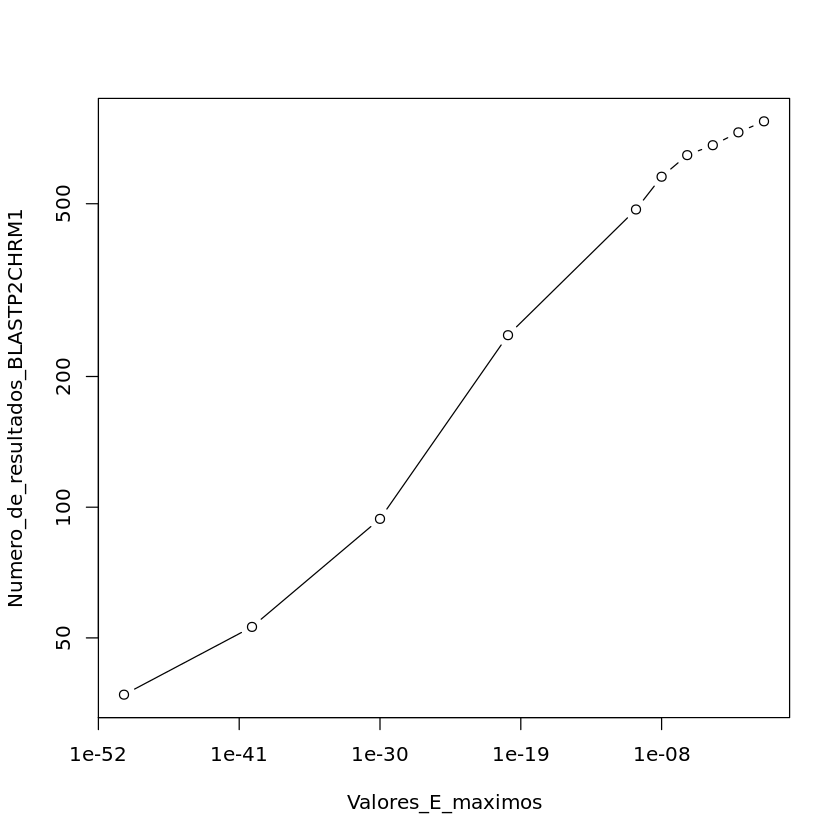

In [21]:
plot(Valores_E_maximos, Numero_de_resultados_BLASTP2CHRM1, log = 'xy', type = 'b')

La tendencia de crecimiento es, más o menos, lineal.

Los alineamientos que tienen criterios cada vez más permisivos suelen ser de longitudes diferentes a los de mayor porcentaje de identidad porque la semejanza se hace menos completa de forma gradual. Este hecho lo podemos comprobar, también, de forma gráfica, para un BLASTP astringente, para otro con un valor E intermedio y para uno con un grado de permisividad mucho mayor.

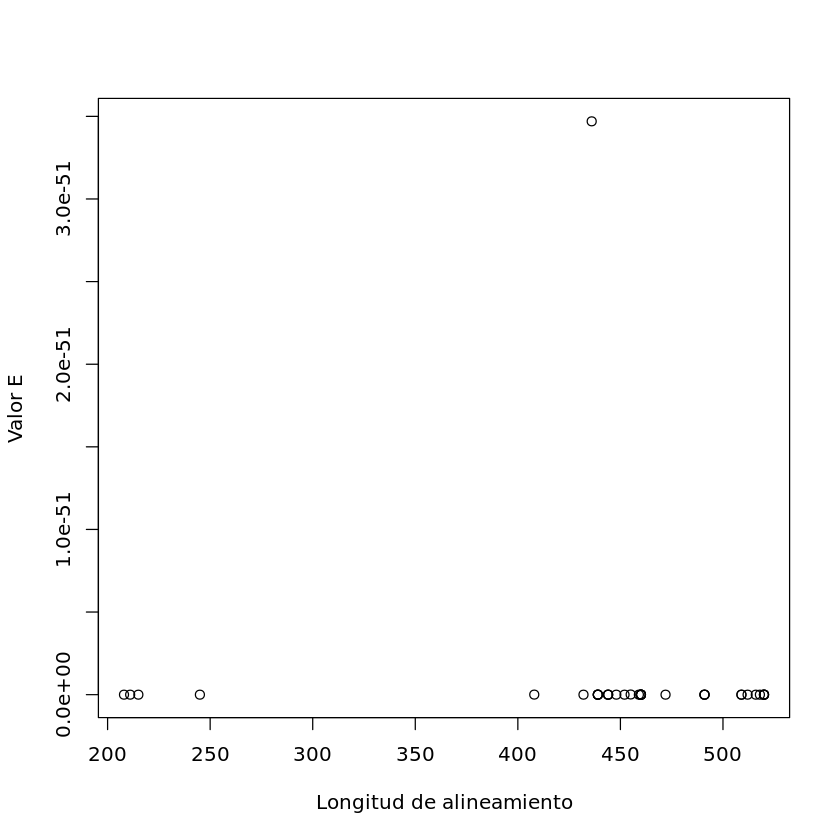

In [7]:
#Representación del BLASTP de valor E astringente
plot(Lista_de_Tablas_CHRM1[[1]]$length, Lista_de_Tablas_CHRM1[[1]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

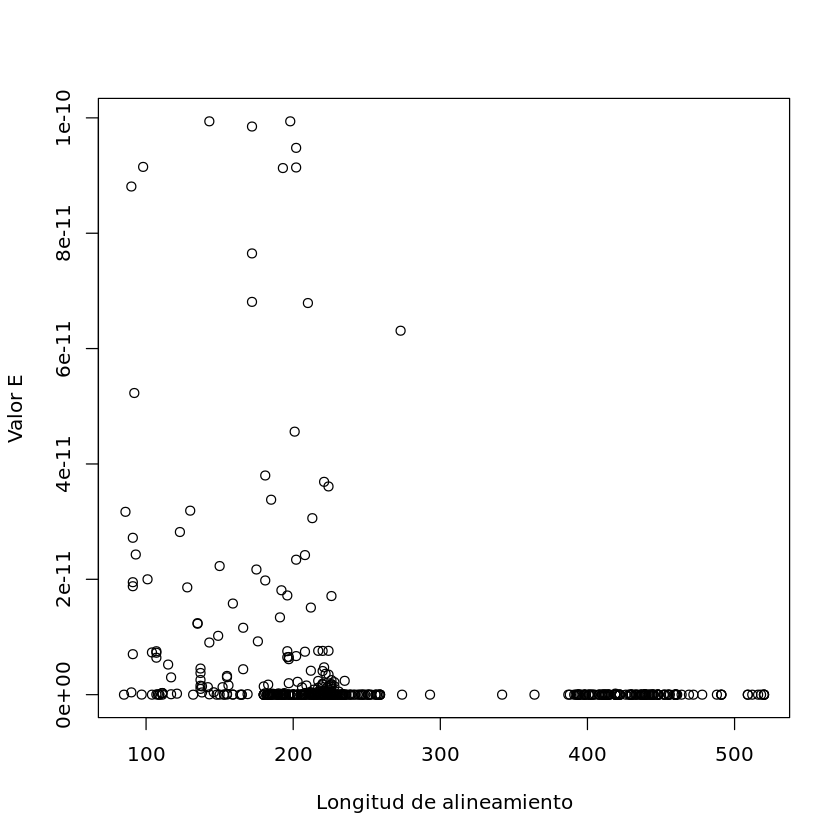

In [8]:
#Representación del BLASTP de valor E intermedio
plot(Lista_de_Tablas_CHRM1[[5]]$length, Lista_de_Tablas_CHRM1[[5]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

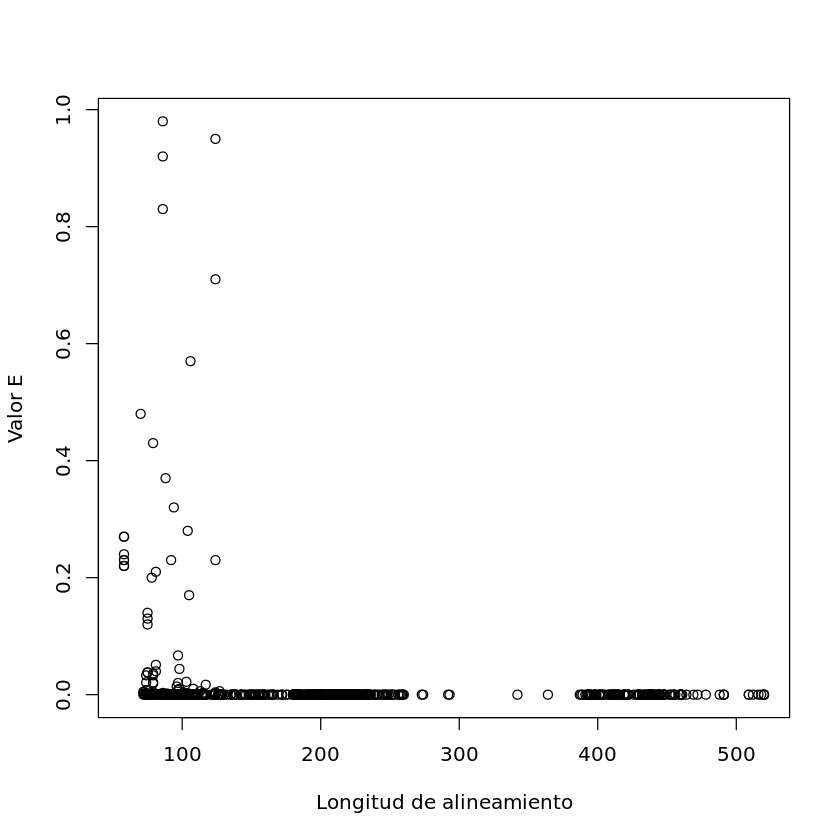

In [9]:
#Representación del BLASTP de valor E laxo
plot(Lista_de_Tablas_CHRM1[[10]]$length, Lista_de_Tablas_CHRM1[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

Efectivamente, se puede observar que los alineamientos más completos, o con mayor porcentaje de similitud, parecen tener una longitud comprendida entre 450 y 550 aminoácidos, aunque la longitud de la secuencia de CHRM1 es de 460 aminoácidos (deducible por la longitud del alineamiento de la *query* consigo misma). Conforme se van relajando los criterios de exigencia de similitud, se van encontrando más alineamientos parciales que tienen una longitud considerablemente menor (comprendida entre 50 y 250 aminoácidos, aproximadamente). Finalmente, cuando el valor E es el más bajo de todos, los alineamientos parciales son cada vez menos extensos, es decir, tienen una longitud comprendida entre 50 y 150 aminoácidos.

Estos alineamientos parciales de tan baja extensión de similitud podrían dar información de una posible secuencia conservada a lo largo del proceso evolutivo. Sabiendo la posible longitud de ésta, y para indagar más sobre este asunto, sería interesante observar en qué parte de la secuencia se producen estas homologías y comparar, consultando Swissprot, la función de la secuencia más lejana evolutivamente de CHRM1 con la del propio receptor, con el fin de dilucidar posibles cambios en el tipo de actividad proteica ejercida.

Para observar en qué aminoácidos se producen estos alineamientos de menor grado de similitud:

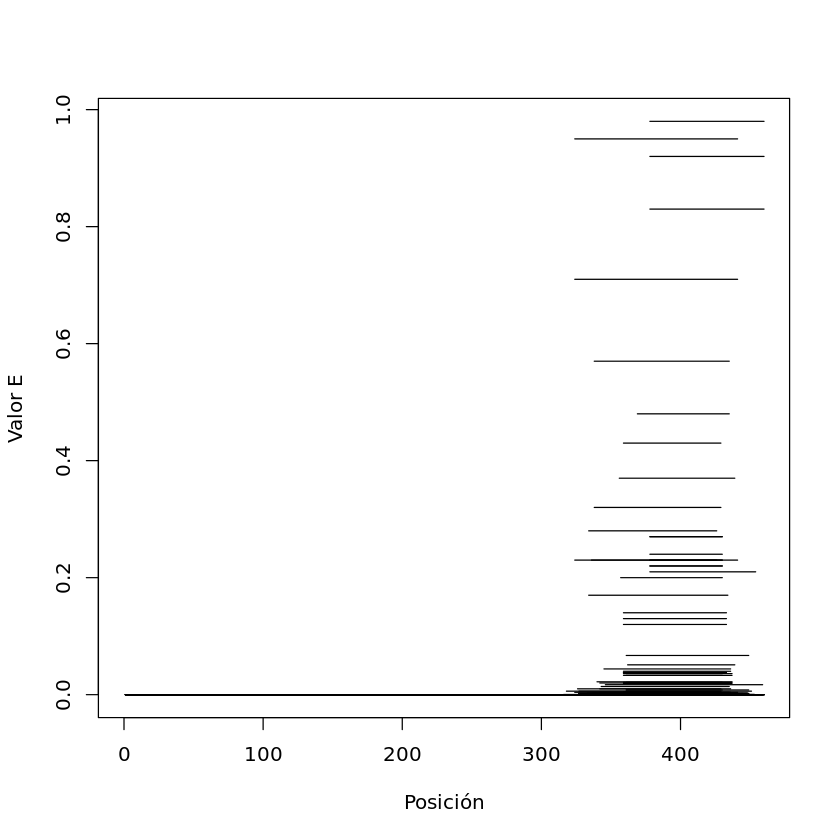

In [12]:
#Esta representación gráfica permite generar segmentos que cubren el tramo de la secuencia de la *query* con la que alinea la *subject*
inicios <- Lista_de_Tablas_CHRM1[[10]]$qstart
finales <- Lista_de_Tablas_CHRM1[[10]]$qend
valoresE <- Lista_de_Tablas_CHRM1[[10]]$evalue

AlineamientoMaximo_CHRM1 <- max(Lista_de_Tablas_CHRM1[[7]]$qend)
plot(c(0, AlineamientoMaximo_CHRM1), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

La posible secuencia conservada de la que hablamos parece encontrarse, más o menos, entre los aminoácidos número 350 y 450, es decir, al final de la secuencia de la proteína. 

Vamos a observar cuáles son los alineamientos con un porcentaje de identidad más bajo en el BLASTP con un valor E mayor para introducir el ID de la proteína en Swissprot y observar qué tipo de proteína es codificada por esa secuencia.


In [11]:
tail(Lista_de_Tablas_CHRM1[[10]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
769,O62795.1,28.477,151,22,170,34,181,1.32e-09,39089,Phoca groenlandica,carnivores
770,Q86917.1,25.758,198,42,233,108,289,1.32e-09,10269,Sheeppox virus KS-1,viruses
771,Q9P1P4.1,23.834,193,42,225,48,234,1.47e-09,9606,Homo sapiens,primates
772,Q9P1P4.1,32.143,84,350,433,241,324,4.38e-06,9606,Homo sapiens,primates
773,Q9Y5X5.2,27.338,139,22,160,144,280,1.58e-09,9606,Homo sapiens,primates
774,Q9Y5X5.2,30.380,79,359,430,370,447,2.83e-04,9606,Homo sapiens,primates


Por lo visto, las cuatro últimas secuencias alineadas también se encuentran en *Homo sapiens* y parecen corresponder, observando el identificador de la secuencia, a dos subtipos de dos proteínas diferentes (ya que los identificadores son diferentes al de CHRM1). También observamos un alineamiento con un virus y una foca, por lo que no son de los grupos taxonómicos de nuestro interés. 

En vez del último comando aplicado, podemos intentar aplicar un filtro que nos devuelva los porcentajes de identidad más bajos de este BLASTP y que, a su vez, nos muestre a qué especie pertenecen:

In [13]:
lapply(Lista_de_Tablas_CHRM1[10], function(x) {
       filtro <- x$pident <= 30.000
       table(x[filtro, 'ssciname'])
    }
) 

[[1]]

                  Alloteuthis subulata                 Amblysomus hottentotus 
                                     2                                      1 
               Amphibalanus amphitrite                    Aplysia californica 
                                     1                                      1 
                           Bombyx mori                             Bos taurus 
                                     2                                     20 
                Branchiostoma belcheri                 Branchiostoma floridae 
                                     1                                      2 
               Caenorhabditis briggsae                 Caenorhabditis elegans 
                                     0                                      6 
                     Calliphora vicina                 Canis lupus familiaris 
                                     1                                     18 
                          Capra hircus       

*Aplysia californica* es un molusco, por lo que podríamos considerarlo lo suficientemente alejado de los mamíferos para realizar esta comparativa de funciones proteicas que deseamos. Una búsqueda manual en el servidor web de BLASTP (Altschul *et al.*, 1990), a partir del archivo `CHRM1.fas` y especificando que las coincidencias se den sólo en este organismo, nos revela que este alineamiento con la secuencia de la babosa marina borracha  corresponde a un receptor de serotonina, los cuales modulan la liberación de neurotransmisores tales como la acetilcolina (Li XC *et al.*, 1995). 

Por último, podemos comprobar todos los grupos taxonómicos presentes en los alineamientos producidos bajo diferentes criterios de valor E:

In [14]:
lapply(Lista_de_Tablas_CHRM1, function(x) table(x$sblastname))

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   1 
      frogs & toads           nematodes            primates             rodents 
                  1                   1                  13                  12 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  1                   1                   1                   1 
           primates             rodents 
                 15                  19 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   2                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

En los alineamientos con un mayor grado de similitud, vemos primates, roedores y ungulados (todos ellos, mamíferos) como grupos taxonómicos con mayor representación. Otros no-mamíferos, como aves, e invertebrados como moscas, crustáceos o nematodos también muestran por lo menos un alineamiento con un valor E bastante bajo. Todos estos grupos están dentro del grupo taxonómico de los cordados. En el alineamiento en el que el valor E es el más alto de todos, seguimos viendo los mismos grupos taxonómicos; de hecho, con más coincidencias de secuencias en cada uno y siendo los mamíferos ya mencionados, de nuevo, los que más veces son encontrados; y algunos nuevos tales como: marsupiales, polillas, conejos, bivalvos... Todos éstos siguen estando dentro del grupo de los cordados a excepción de un grupo de proteomas víricos en los cuales observamos dos alineamientos.

El alineamiento con los dos genomas víricos puede ser comprobado, de nuevo, viendo si éste tiene una longitud como para ser considerado una homología significativa. Para ello, filtramos los resultados de menos de 300 aminoácidos:

In [4]:
lapply(Lista_de_Tablas_CHRM1, function(x) {
       filtro <- x$length >= 300
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   0 
      frogs & toads           nematodes            primates             rodents 
                  1                   0                  13                  10 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  0                   1                   1                   0 
           primates             rodents 
                 15                  15 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   1                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

En los alineamientos del BLASTP más estrictos, observamos que el grupo taxonómico de los nematodos se ha quedado sin representación, lo que es indicativo de que esta homología, aunque tiene unas probabilidades de haber sido generada aleatoriamente despreciables, era menor a 300 aminoácidos de longitud; ídem con las moscas. Ambos grupos taxonómicos corresponden a los alineamientos con *Caenorhabditis elegans* y *Drosophila melanogaster* comentados en el primer BLAST individual.

Los primates y roedores, así como los mamíferos en general, siguen siendo los que más homologías de mayor grado presentan. Lo mismo ocurre con los grupo taxonómicos del BLASTP más permisivo: mamíferos y vertebrados son los que más veces muestran homologías con la *query* introducida y otros más lejanos evolutivamente que mostraban también algunas coincidencias, como bivalvos, saltamontes, lagartos o lancetas, dejan de tener representación por tener una longitud de coincidencia menor a los 300 aminoácidos. Esto último también ocurre con los proteomas víricos que sorprendentemente habíamos visto alineados. Ahora sabemos que esta coincidencia no es demasiado extensa y que probablemente se deba a una homología esporádica o, incluso, con un valor E relativamente alto.

## Discusión
A lo largo de este análisis, hemos alineado la secuencia proteica de CHRM1, presente en el archivo `CHRM1.fas`, con las proteínas presentes en la base de datos Swissprot gracias al programa de alineamiento local de secuencias BLASTP (Altschul *et al.* (1990). Con estas herramientas, hemos podido observar varios aspectos a resaltar:

Por un lado, hemos observado que las homologías con mayor porcentaje de coincidencia corresponden a mamíferos (primates, roedores y ungulados pares), lo cual coincide con la hipótesis incial establecida al respecto: los grupos filogenéticos más cercanos a *Homo sapiens* serían los que presentarían homologías más completas. Otras especies de grupos más lejanos, como *Drosophila melanogaster* o *Caenorhabditis elegans* también han sido identificados de esta manera, pero estas coincidencias han demostrado ser bastante cortas: de menos de 300 aminoácidos. Conforme hemos ido realizando búsquedas BLASTP con valores E más grandes y, por tanto, más permisivos, hemos observado un aumento progresivo en el número de alineamientos encontrados, que sigue una tendencia más o menos lineal y directamente propocional que muestra coincidencias de cada vez menor longitud, hasta observar un tamaño estable de 100 aminoácidos aproximadamente y que parecen coincidir, en su mayoría, con el tramo comprendido entre las posiciones número 350 y 450 de la secuencia de la *query* introducida. Ello puede dar indicios de una evolución de CHRM1 progresiva; desde el antecesor común en el que surgió por primera vez; en la que, en cada grupo taxonómico, va mutando de diferente manera según el sistema nervioso del clado hasta adoptar la forma que es codificada en la célula humana. También se puede intuir la presencia de una parte codificante conservada evolutivamente. Una búsqueda manual en el servidor web de BLASTP de una de las coincidencias de menor grado de similitud, perteneciente a *Aplysia californica*, nos ha permitido observar que la función del péptido codificado permanecería intacta, por lo menos, hasta el grupo taxonómico de los moluscos pese a las diferentes formas que adopta el Sistema Nervioso en diferentes clados desde los primeros indicios de los mismos en los plexos nerviosos de los cnidarios. Todos los grupos taxonómicos con los que ha habido alineamiento pertenecen al conjunto de los cordados y no ha habido resultados significativos más allá de esta rama del árbol filogenético eucariota, por lo que este hecho proporcionaría evidencia favorable al origen evolutivo de CHRM1 propuesto por Viscardi *et al.* (2021). Sin embargo, ha resultado sorprendente no encontrar alineamientos con ningún cnidario. Podría realizarse un estudio similar a este pero utilizando las secuencias nucleotídicas codificantes en lugar de las proteicas, es decir, un BLAST normal, ya que, al tratarse de sistemas biológicos diferentes, la razón por la que no hubiera alineamiento en este grupo de animales podría radicar en el uso de un código genético con preferencias de tripletes diferente a la de los cordados.

Por el otro lado, es cierto que, pese a esta evidencia favorable, se han observado dos coincidencias de secuencia con proteomas víricos, pero han demostrado ser de una longitud menor a los 300 aminoácidos. Uno de estos virus es el causante de la viruela ovina (Sheepox virus) y, el otro, es uno que toma al cerdo como hospedador habitual (Swinepox virus). Ambos pertenecen a la familia de *Poxviridiae* y tienen un genoma de dsDNA (Fenner and Nakano, 1988), por lo que la hipótesis inicial establecida referente a que se tratasen de retrovirus que se habían integrado, dentro del genoma mamífero hospedador, en las proximidades de CHRM1 y en su replicación hubieran incorporado fragmentos de la secuencia de los receptores muscarínicos queda descartada. Sería interesante rastrear el linaje evolutivo de estos virus asociados a mamíferos para encontrar una respuesta fructífera. Por ahora, barajamos una incorporación de dicha secuencia relacionada con la infección en sus respectivos hospedadores.

Por último, resaltar una observación en los BLASTP de valor E más estricto. Si bien cierto que la mayoría de los alineamientos tienen una longitud muy cercana a la longitud total del receptor muscarínico de acetilcolina (460 aa), es posible observar algunas homologías de 500 a 550 aminoácidos, es decir, de mayor longitud que la propia secuencia de partida. Si ejecutamos `TablaBLASTPCHRM1` y observamos las posiciones de las coincidencias, por ejemplo, en *Bos taurus*, observamos que la homología, en la *query* ocupa del aminoácido 10 al 438, mientras que en la secuencia del toro ocupa de la posición 51 a la 564. Se puede observar que ambas longitudes no coinciden en tamaño. A priori, quedaría pendiente resolver esta incongruencia.



## Referencias
- Lucas Henriques Viscardi, Danilo Oliveira Imparato, Maria Cátira Bortolini, Rodrigo Juliani Siqueira Dalmolin, Ionotropic Receptors as a Driving Force behind Human Synapse Establishment, Molecular Biology and Evolution, Volume 38, Issue 3, March 2021, Pages 735–744, doi:10.1093/molbev/msaa252.
- Stephen F. Altschul, Warren Gish, Webb Miller, Eugene W. Myers and David J. Lipman. Basic local alignment search tool, *Journal of Molecular Biology*, Volume 215, Issue 3, 1990, Pages 403-410, [doi:10.1016/S0022-2836(05)80360-2](https://doi.org/10.1016/S0022-2836(05)80360-2).
- Li XC, Giot JF, Kuhl D, Hen R, Kandel ER. Cloning and characterization of two related serotonergic receptors from the brain and the reproductive system of Aplysia that activate phospholipase C. J Neurosci. 1995 Nov;15(11):7585-91. [doi: 10.1523/JNEUROSCI.15-11-07585.1995]. Erratum in: J Neurosci. 2003 Aug 20;23(20):table of contents. PMID: 7472509; PMCID: PMC6578061 (https://doi.org/10.1523/JNEUROSCI.15-11-07585.1995.
- Fenner F., Nakano J.H. (1988) Poxviridae: The Poxviruses. In: Laboratory Diagnosis of Infectious Diseases Principles and Practice. Springer, New York, NY. https://doi.org/10.1007/978-1-4612-3900-0_10
